# Script to download complete genomes from NCBI (e.g., *Wolbachia* dif. strains).

I fucked up and did the 'useless' things for my course project; nonetheless, it may be useful for future.

_________________
At first, let's look at the whole set of *Wolbachia* complete genomes manually (at the NCBI website):

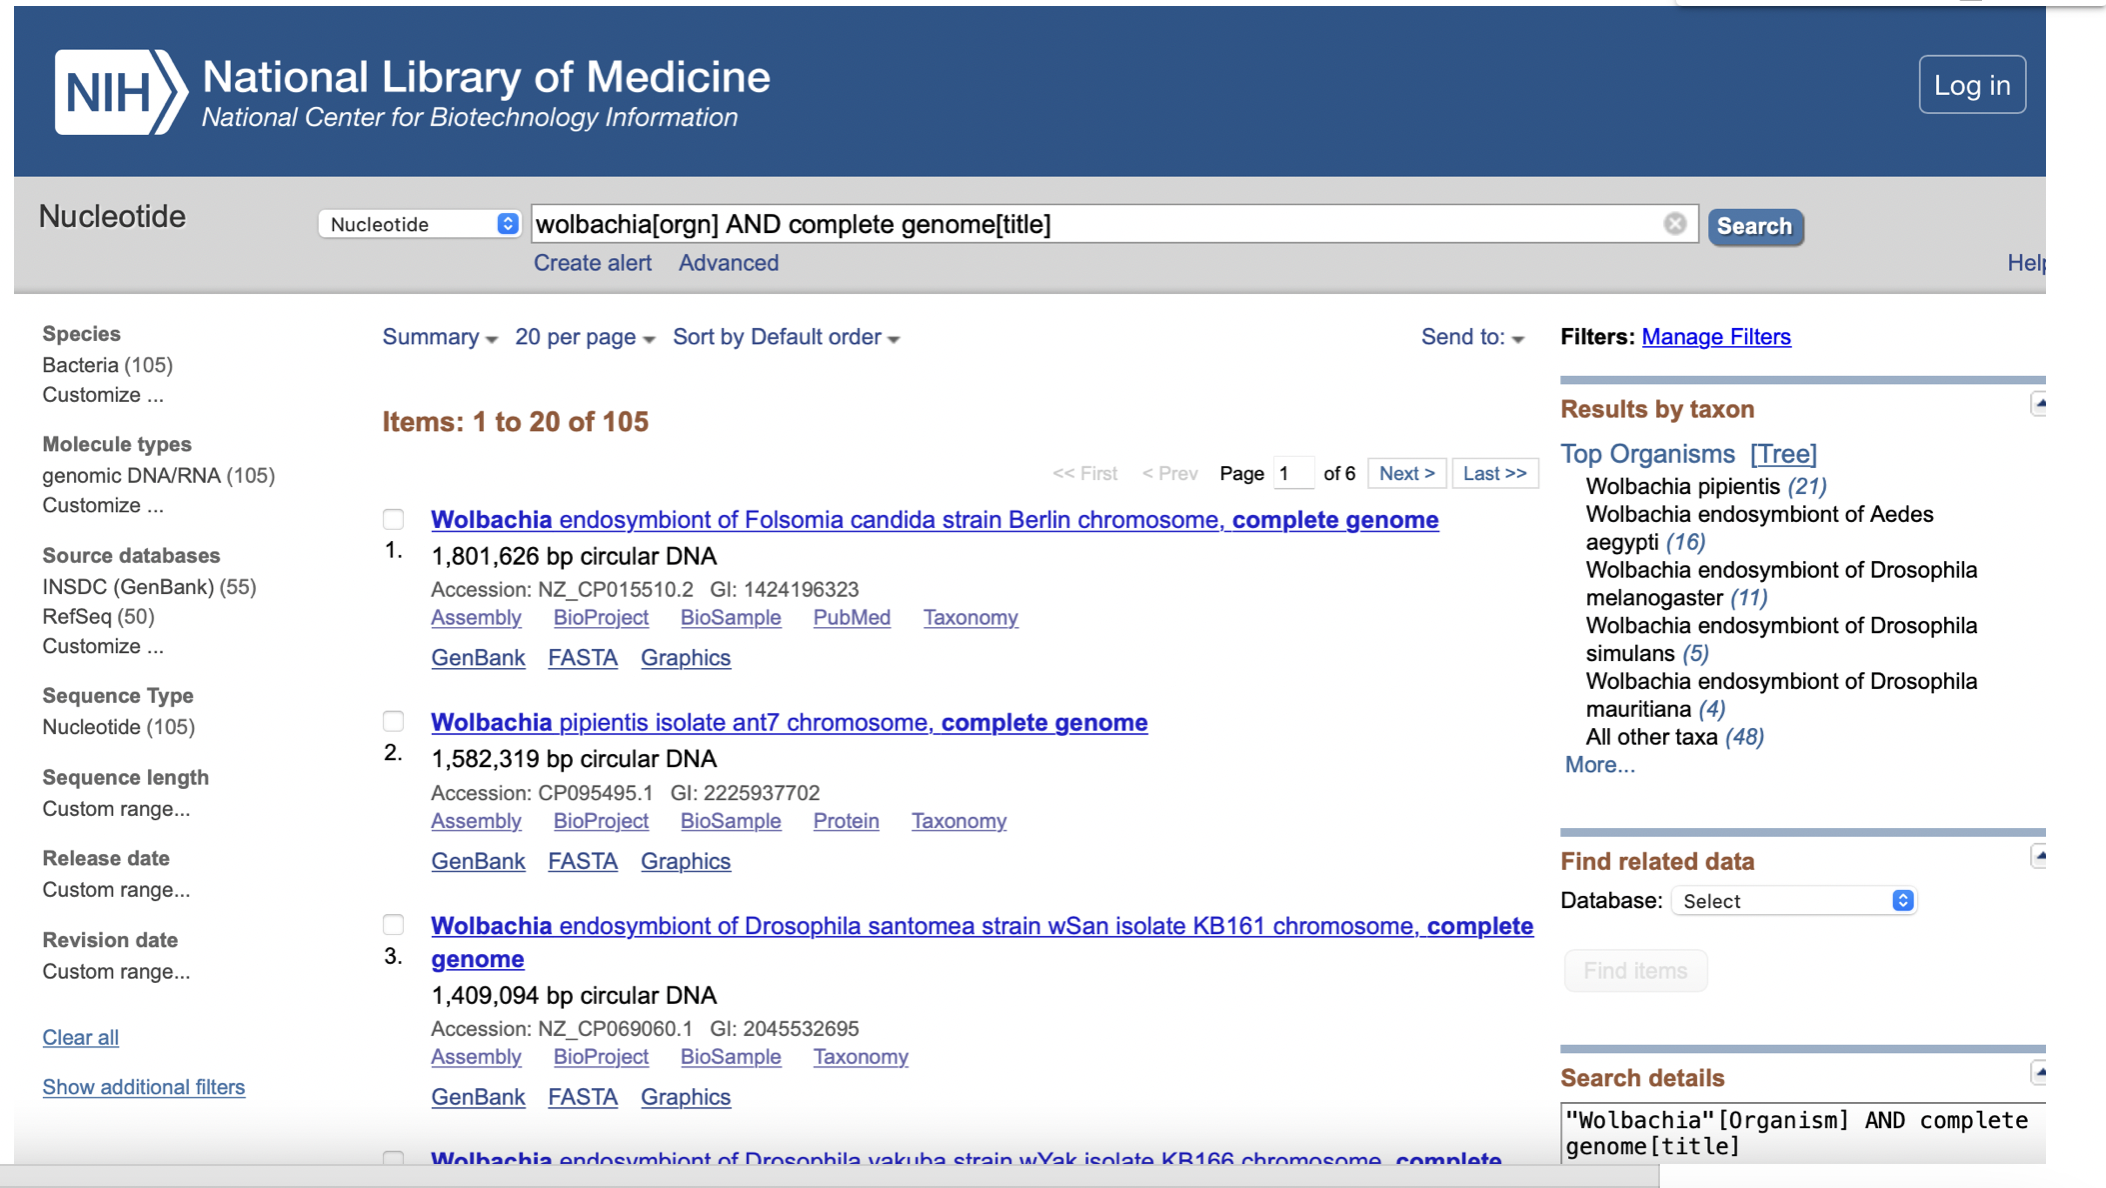

The genomes differ depending on which host organism they are retrieved from.

It has 105 complete genomes at NCBI. Let's download them in fasta format.

In [1]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 4.3 MB/s 


In [2]:
from Bio import Entrez

Entrez.email = "rk@wgenome"
search_term = "wolbachia[orgn] AND complete genome[title]"
handle = Entrez.esearch(db="nucleotide", term=search_term)
result = Entrez.read(handle)
handle.close()
print(result["Count"]) # to check everything is correct (all the genomes are going to be downloaded)

105


In [3]:
# Download all seqs in one fasta file.

filename = "Wolbachia_complete_genomes.fasta"
IDs = Entrez.read(Entrez.esearch(db="nucleotide", term=search_term, retmax=105))["IdList"]
with open(filename, "w") as f:
  for ID in IDs:
    record = Entrez.efetch(db="nucleotide", id=ID, rettype="fasta", retmode="text")
    f.write(record.read())

In [4]:
# Download all seqs in several (n genomes) fasta files in folder /genomes.

!mkdir genomes

In [6]:
IDs = Entrez.read(Entrez.esearch(db="nucleotide", term=search_term, retmax=105))["IdList"]
for ID in IDs:
  fname = f"wolbachia_complete_dna_{ID}.fasta"
  with open(fname, "w") as f:
    record = Entrez.efetch(db="nucleotide", id=ID, rettype="fasta", retmode="text")
    f.write(record.read())

In [7]:
!find wolbachia_complete_dna* | wc -l # check how many files (everything is ok -> 105)
!mv wolbachia* genomes/

105


We have obtained the 1 .fasta file w/ all nucleotide seqs + 105 .fasta files that contain specific *Wolbachia* strain's nucleotide seq, in turn.